# Assignment 5: Pandas Fundamentals with Earthquake Data
# Yianna Bekris
# RCES
# 3/19/2024

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eq_df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv")

In [11]:
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [12]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


In [6]:
eq_df['time'] = pd.to_datetime(eq_df['time'])

In [9]:
eq_df.set_index('id', inplace=True)

In [10]:
eq_df.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


In [14]:
eq_df["mag"].nlargest(20)

id
usc000nzvd    8.2
usc000rki5    7.9
usc000p27i    7.7
usc000phx5    7.6
usb000pr89    7.5
usc000piqj    7.4
usb000slwn    7.3
usb000pq41    7.2
usc000pft9    7.1
usc000sxh8    7.1
usc000stdc    7.1
usb000sk6k    7.0
usc000mnvj    6.9
usc000nzwm    6.9
usb000r2hc    6.9
usc000rngj    6.9
usc000rkg5    6.9
usb000ruzk    6.9
usc000rr6a    6.9
usb000rzki    6.9
Name: mag, dtype: float64

In [34]:
eq_df["place"].head()
# The "place" column has the state and country information as the
# last part of the string, after a comma. This should be easy to 
# extract by using str.split with the seperator as "," and the 
# last index of the resulting list.

id
ak11155107    26km S of Redoubt Volcano, Alaska
nn00436847              32km S of Alamo, Nevada
ak11151142     12km NNW of North Nenana, Alaska
ak11151135           22km S of Cantwell, Alaska
ci37171541         10km WNW of Progreso, Mexico
Name: place, dtype: object

In [ ]:
eq_df["country"] = eq_df["place"].str.split(",").str.get(-1)

In [18]:
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


In [19]:
eq_df["country"].unique()

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri',
       'South of the Fiji Islands', ' Montana', ' British Virgin Islands',
       ' Washington', ' Oregon', ' Canada', ' Fiji', 'Wyoming',
       ' Antarctica', ' Chile', ' Utah', ' Indonesia', ' Solomon Islands',
       ' Micronesia', ' Oklahoma', ' Hawaii', ' Wyoming', ' Russia',
       ' Arizona', ' Philippines', ' Bolivia', ' Greece', ' Japan',
       ' Puerto Rico', ' Iran', ' Tonga', ' Wallis and Futuna',
       ' Colorado', ' Guam', ' CA', 'Carlsberg Ridge', ' Idaho',
       ' Pakistan', 'Off the west coast of northern Sumatra', ' Burma',
       ' China', ' Peru',
       'Off the east coast of the North Island of New Zealand',
       ' Costa Rica', 'Reykjanes Ridge', ' East Timor',
       'Central East Pacific Rise', 'Mid-Indian Ridge', ' Japan region',
       ' Northern Mariana Islands', ' El Salvador', ' Samoa',
       'Northern Mid-Atlantic Ridge', ' Taiwan', ' Arka

In [21]:
eq_df_4_mag = eq_df[eq_df['mag'] >= 4.0]

In [25]:
eq_counts = eq_df_4_mag['country'].value_counts()

In [39]:
eq_counts.head()

country
Indonesia           2116
Papua New Guinea    1354
Japan               1150
Chile               1124
New Zealand          758
Name: count, dtype: int64

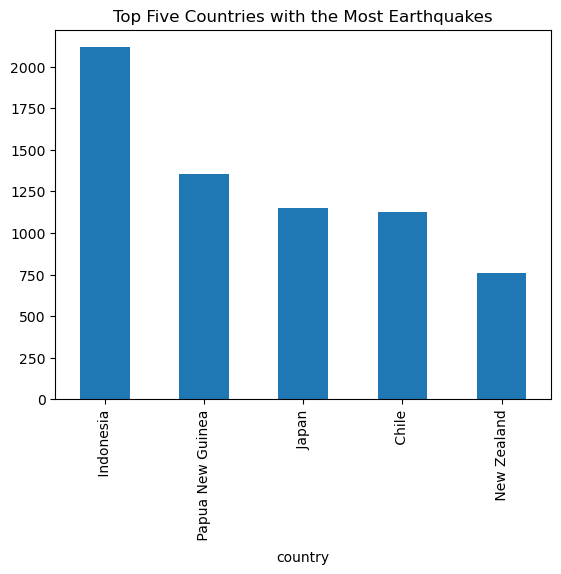

In [43]:
eq_counts.head().plot(kind='bar');
plt.title("Top Five Countries with the Most Earthquakes");

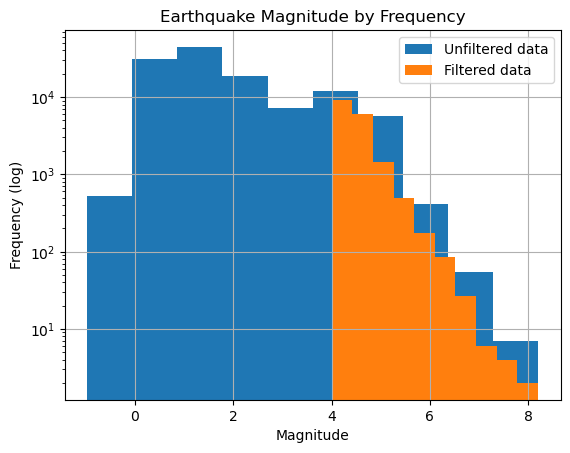

In [45]:
eq_df["mag"].hist(label="Unfiltered data");
eq_df_4_mag["mag"].hist(label="Filtered data");
plt.yscale("log");
plt.legend();
plt.xlabel("Magnitude");
plt.ylabel("Frequency (log)");
plt.title("Earthquake Magnitude by Frequency");
# The filtered data appears to be in the the tail of the distribution
# of the unfiltered data

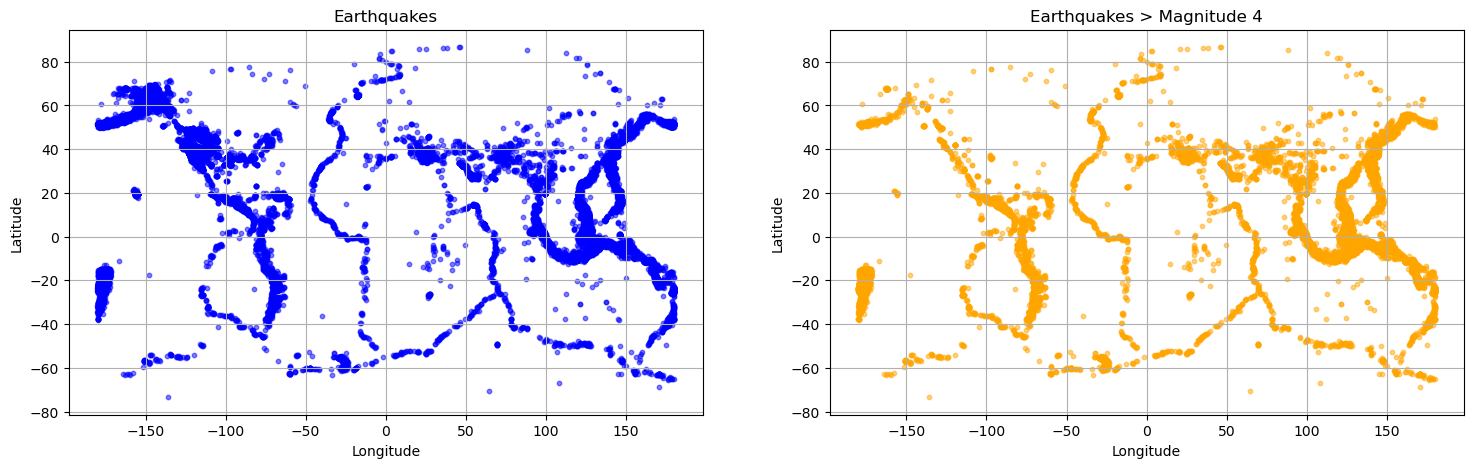

In [57]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.scatter(eq_df['longitude'], eq_df['latitude'], s=10, color='blue', alpha=0.5)
plt.title('Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(eq_df_4_mag['longitude'], eq_df_4_mag['latitude'], s=10, color='orange', alpha=0.5)
plt.title('Earthquakes > Magnitude 4')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
# In the unfiltered dataset, there are many more earthquakes in the western US and Canada, and North America in general.
# Across the rest of the world however, the number of earthquakes plotted appears to be similar.
# This might mean that there is better detection in the US and Canada.